In [77]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

<h2/> Data Loading

In [2]:
# Set the start and end date for fetching stock data
start_date = "2016-01-01"
end_date = datetime.datetime.today().strftime('2025-02-18')

# Get historical data from the stock from January 1, 2016 to end_date
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(start=start_date, end=end_date)

In [3]:
display(tesla_data)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,15.381333,15.425333,14.600000,14.894000,102406500,0.0,0.0
2016-01-05 00:00:00-05:00,15.090667,15.126000,14.666667,14.895333,47802000,0.0,0.0
2016-01-06 00:00:00-05:00,14.666667,14.670000,14.398667,14.602667,56686500,0.0,0.0
2016-01-07 00:00:00-05:00,14.279333,14.562667,14.244667,14.376667,53314500,0.0,0.0
2016-01-08 00:00:00-05:00,14.524000,14.696000,14.051333,14.066667,54421500,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,356.209991,362.700012,350.510010,350.730011,77514900,0.0,0.0
2025-02-11 00:00:00-05:00,345.799988,349.369995,325.100006,328.500000,118543400,0.0,0.0
2025-02-12 00:00:00-05:00,329.940002,346.399994,329.119995,336.510010,105382700,0.0,0.0


<h2/> Data Preprocessing

In [4]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2294 entries, 2016-01-04 00:00:00-05:00 to 2025-02-14 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2294 non-null   float64
 1   High          2294 non-null   float64
 2   Low           2294 non-null   float64
 3   Close         2294 non-null   float64
 4   Volume        2294 non-null   int64  
 5   Dividends     2294 non-null   float64
 6   Stock Splits  2294 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 143.4 KB


In [5]:
tesla_data[tesla_data.isnull().any(axis=1)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [7]:
tesla_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<h2/> EDA and Visualization

<h4/> Descriptive Statistics

In [21]:
print("Descriptive Statistics:")
display(tesla_data.describe())

Descriptive Statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.0,2294.000000
mean,130.339074,133.221245,127.254613,130.297563,1.170767e+08,0.0,0.003487
std,118.390114,121.046423,115.442288,118.269055,7.511180e+07,0.0,0.121719
min,9.488000,10.331333,9.403333,9.578000,2.489250e+07,0.0,0.000000
25%,20.025334,20.403167,19.633833,20.023000,7.072478e+07,0.0,0.000000
50%,99.460667,101.970665,96.712666,99.235668,9.705575e+07,0.0,0.000000
75%,230.552505,235.639164,225.444996,231.561668,1.345007e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


In [30]:
sns.set_style("darkgrid")       # Dark background with grid for contrast
sns.set_context("notebook")     # Optimized for Jupyter readability
sns.set_palette("husl")         # Vibrant, distinct colors
plt.rcParams['figure.figsize'] = (14, 6)  # Default figure size

<h4/> Time Series Plot (Open, High, Low, Close)

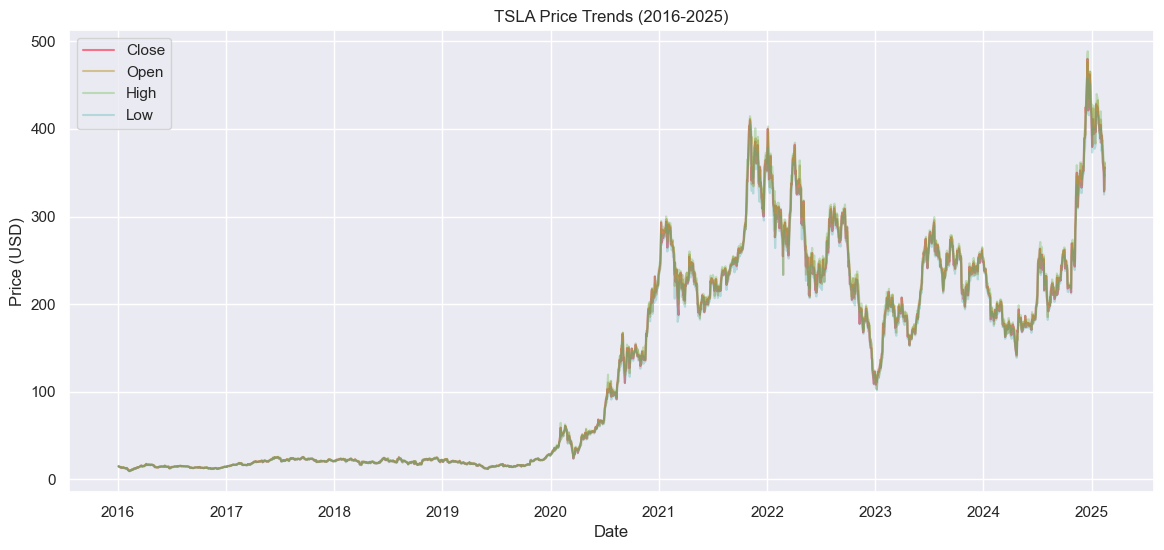

In [54]:
sns.lineplot(data=tesla_data, x=tesla_data.index, y='Close', label='Close')
sns.lineplot(data=tesla_data, x=tesla_data.index, y='Open', label='Open', alpha=0.5)
sns.lineplot(data=tesla_data, x=tesla_data.index, y='High', label='High', alpha=0.3)
sns.lineplot(data=tesla_data, x=tesla_data.index, y='Low', label='Low', alpha=0.3)
plt.title('TSLA Price Trends (2016-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<h4/> Close Price (Last Year Zoom-in)

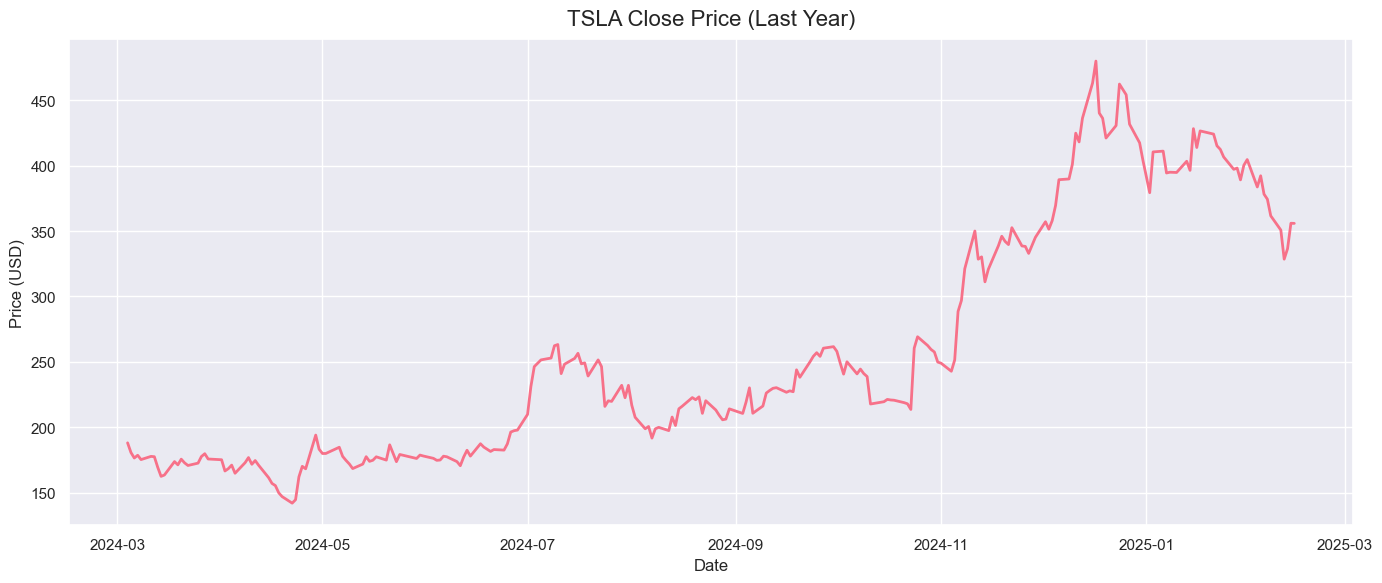

In [32]:
last_year = tesla_data[tesla_data.index >= '2024-03-04']

plt.figure()
sns.lineplot(data=last_year, x=last_year.index, y='Close', linewidth=2)
plt.title('TSLA Close Price (Last Year)', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Close Price Distribution

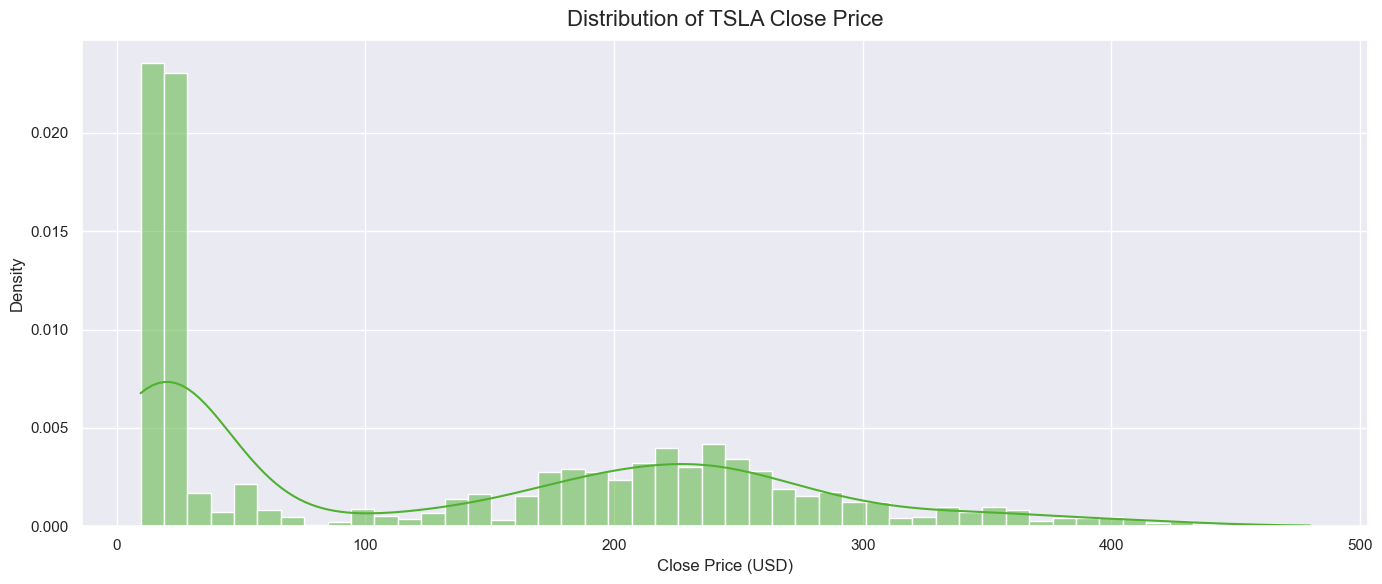

In [38]:
plt.figure()
sns.histplot(data=tesla_data, x='Close', bins=50, kde=True, color=sns.color_palette("husl")[2], stat='density')
plt.title('Distribution of TSLA Close Price', fontsize=16, pad=10)
plt.xlabel('Close Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> ADF Test for Stationarity

In [42]:
adf_result = adfuller(tesla_data['Close'].dropna())
print("ADF Test for Stationarity (Close):")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")

ADF Test for Stationarity (Close):
ADF Statistic: -1.0655899810102347
p-value: 0.728597404590341
Non-Stationary


<h4/> Daily Returns Time Series Plot

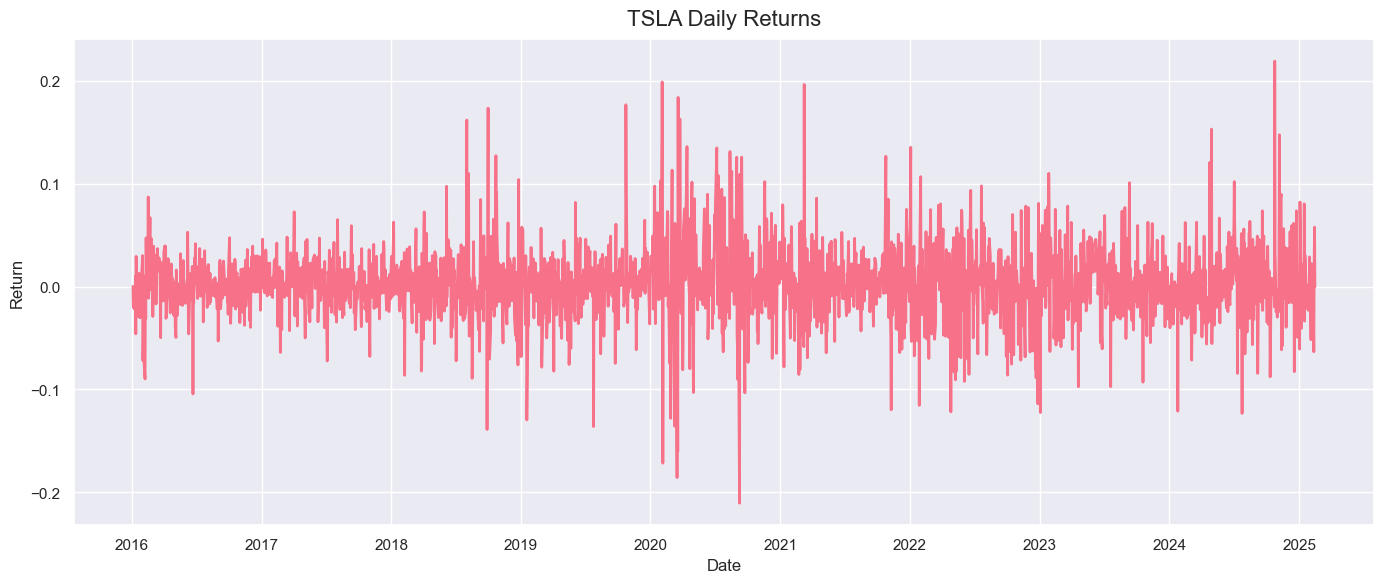

In [43]:
returns = tesla_data['Close'].pct_change().dropna()
returns_df = pd.DataFrame({'Returns': returns}, index=returns.index)
plt.figure()
sns.lineplot(data=returns_df, x=returns_df.index, y='Returns', linewidth=2)
plt.title('TSLA Daily Returns', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Correlation Matrix

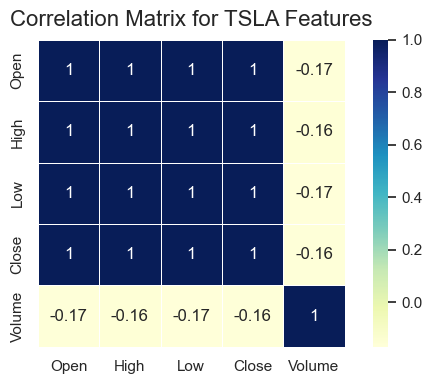

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(tesla_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='YlGnBu', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix for TSLA Features', fontsize=16, pad=10)
plt.tight_layout()
plt.show()

<h4/> Rolling Mean and Std Dev

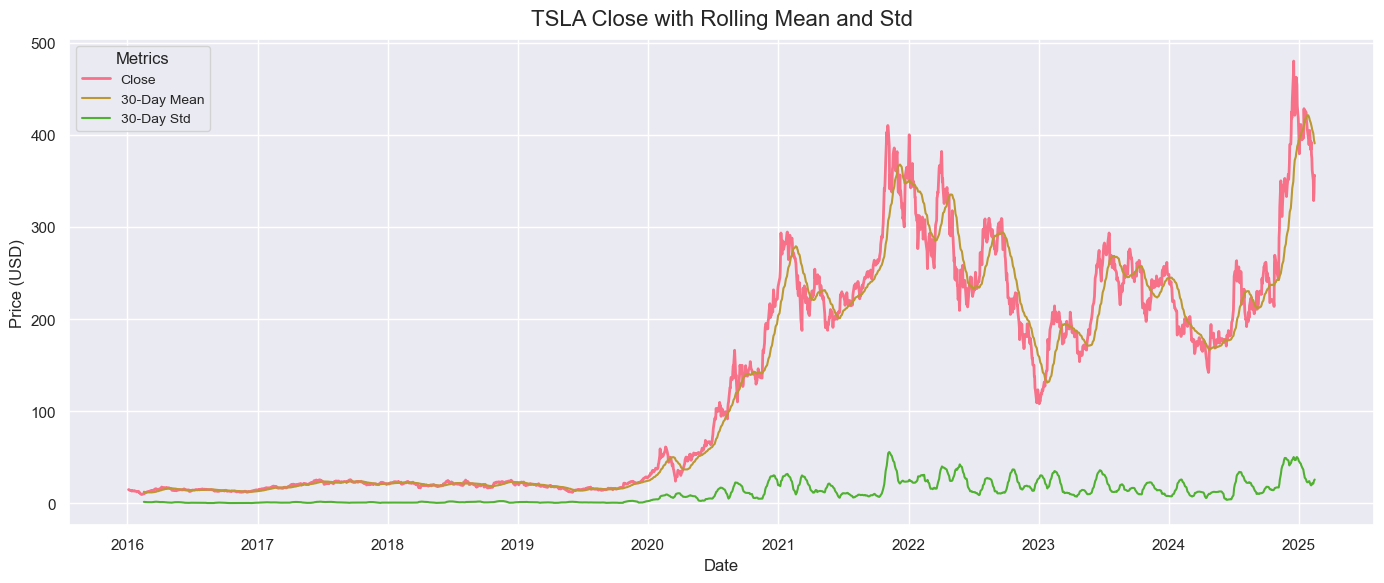

In [46]:
rolling_mean = tesla_data['Close'].rolling(window=30).mean()
rolling_std = tesla_data['Close'].rolling(window=30).std()
rolling_df = pd.DataFrame({'Close': tesla_data['Close'], '30-Day Mean': rolling_mean, '30-Day Std': rolling_std})
plt.figure()
sns.lineplot(data=rolling_df, x=rolling_df.index, y='Close', label='Close', linewidth=2)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Mean', label='30-Day Mean', linewidth=1.5)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Std', label='30-Day Std', linewidth=1.5)
plt.title('TSLA Close with Rolling Mean and Std', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.tight_layout()
plt.show()

<h2/> Forecasting Models

<h3/> Feature Selection and Engineering

In [57]:
data = tesla_data.drop(columns=['Dividends', 'Stock Splits'])

In [59]:
# Lagged features
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag7'] = data[col].shift(7)

# Moving averages
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    data[f'{col}_ma7'] = data[col].rolling(window=7).mean()

In [60]:
# Datetime features 
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

In [61]:
data = data.dropna()

In [62]:
target = 'Close'
features = [col for col in data.columns if col != target]

<h4/> Scaling

In [65]:
# Scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(
        data
    ), 
    columns=data.columns, 
    index=data.index
)

<h4/> Train-Test Split

In [66]:
# Train-Test Split 
train_data = data.iloc[:-21]  # All but last 21 days
test_data = data.iloc[-21:]   # Last 21 days for validation
train_scaled = scaled_data.iloc[:-21]
test_scaled = scaled_data.iloc[-21:]

In [84]:
print("Preprocessed Shape:", data.shape)
print("Features:", features)
print("Sample Data:")
print(data.head())

Preprocessed Shape: (2287, 22)
Features: ['Open', 'High', 'Low', 'Volume', 'Open_lag1', 'Open_lag7', 'High_lag1', 'High_lag7', 'Low_lag1', 'Low_lag7', 'Close_lag1', 'Close_lag7', 'Volume_lag1', 'Volume_lag7', 'Open_ma7', 'High_ma7', 'Low_ma7', 'Close_ma7', 'Volume_ma7', 'day_of_week', 'month']
Sample Data:
                                Open       High        Low      Close  \
Date                                                                    
2016-01-13 00:00:00-05:00  14.134000  14.176667  13.333333  13.354000   
2016-01-14 00:00:00-05:00  13.480667  14.000000  12.892000  13.745333   
2016-01-15 00:00:00-05:00  13.264667  13.671333  13.150000  13.666000   
2016-01-19 00:00:00-05:00  13.914000  14.031333  13.385333  13.648000   
2016-01-20 00:00:00-05:00  13.293333  13.418667  12.750000  13.246667   

                             Volume  Open_lag1  Open_lag7  High_lag1  \
Date                                                                   
2016-01-13 00:00:00-05:00  61896000 

In [68]:
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features] 
y_test = test_data[target]

<h3/> Linear Regression

In [69]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predict on test set (validation)
lr_pred = lr_model.predict(X_test)

# Forecast next 21 days (approximation)
lr_forecast = lr_model.predict(data[features].iloc[-21:])

In [73]:
future_dates = pd.bdate_range(start=start_date, periods=21)

In [79]:
rmse = root_mean_squared_error(y_test, lr_pred)
mae = mean_absolute_error(y_test, lr_pred)
print(f"Validation RMSE: {rmse:.2f} USD")
print(f"Validation MAE: {mae:.2f} USD")

Validation RMSE: 5.40 USD
Validation MAE: 4.66 USD


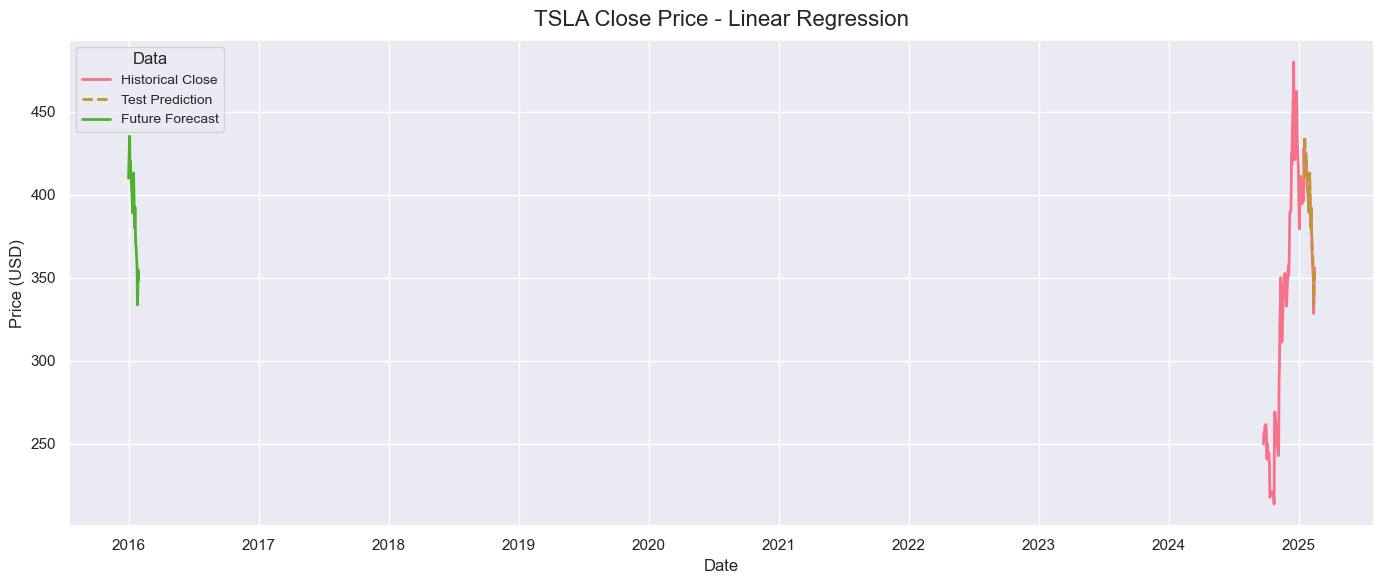

In [81]:
plt.figure()
sns.lineplot(x=data.index[-100:], y=data[target][-100:], label='Historical Close', linewidth=2)
sns.lineplot(x=test_data.index, y=lr_pred, label='Test Prediction', linewidth=2, linestyle='--')
sns.lineplot(x=future_dates, y=lr_forecast, label='Future Forecast', linewidth=2)
plt.title('TSLA Close Price - Linear Regression', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Data', fontsize=10)
plt.tight_layout()
plt.show()